<a href="https://colab.research.google.com/github/shreyasstha/data/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#data cleaning

In [3]:
import pandas as pd
df = pd.read_csv('/content/student_info.csv')
print(df)

     Name   Age Grade  Gender  Subject  Score
0   Alice  20.0     A  Female    Maths   88.0
1     Bob  19.0   NaN    Male      NaN   75.0
2   Alice   NaN     B    Male  Science    NaN
3   David  21.0     A     NaN  English   92.0
4     Bob  22.0     C  Female   Nepali   68.0
5   Frank  20.0     B    Male   Social   80.0
6   David   NaN     A  Female      NaN   85.0
7  Hannah  23.0   NaN  Female   Health    NaN
8  Hannah  21.0     B     NaN  English   77.0
9   David  20.0     C    Male   Nepali   79.0


In [ ]:
print(df.columns)


Index(['Name', 'Age', 'Grade', 'Gender', 'Subject', 'Score'], dtype='object')


In [ ]:
print(df.isnull().sum())


Name       0
Age        2
Grade      2
Gender     2
Subject    2
Score      2
dtype: int64


In [ ]:
#dropped the column with NaN
df_cleaned = df.dropna()
print(df_cleaned)


    Name   Age Grade  Gender Subject  Score
0  Alice  20.0     A  Female   Maths   88.0
4    Bob  22.0     C  Female  Nepali   68.0
5  Frank  20.0     B    Male  Social   80.0
9  David  20.0     C    Male  Nepali   79.0


In [4]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [5]:
df['Grade']= df['Grade'].fillna(df['Grade'].mode()[0])

In [6]:
df['Gender']= df['Gender'].fillna('Not Specified')

In [7]:
df['Score'] = df['Score'].fillna(df['Score'].median())

In [8]:
df['Subject'] = df['Subject'].fillna("Moral")
#df['Subject'].fillna('Unknown', inplace=True) => inplace return NULL values

In [ ]:
#df['Age'] = df['Age'].fillna(13)


In [9]:
print(df)

     Name    Age Grade         Gender  Subject  Score
0   Alice  20.00     A         Female    Maths   88.0
1     Bob  19.00     A           Male    Moral   75.0
2   Alice  20.75     B           Male  Science   79.5
3   David  21.00     A  Not Specified  English   92.0
4     Bob  22.00     C         Female   Nepali   68.0
5   Frank  20.00     B           Male   Social   80.0
6   David  20.75     A         Female    Moral   85.0
7  Hannah  23.00     A         Female   Health   79.5
8  Hannah  21.00     B  Not Specified  English   77.0
9   David  20.00     C           Male   Nepali   79.0


In [10]:
df.to_csv("cleaned_students.csv", index=False)


In [ ]:
# Ensure Age and Score are numeric
df['Age'] = df['Age'].astype(int)
df['Score'] = df['Score'].astype(int)
print(df)


     Name  Age Grade         Gender  Subject  Score
0   Alice   20     A         Female    Maths     88
1     Bob   19     A           Male    Moral     75
2   Alice   20     B           Male  Science     79
3   David   21     A  Not Specified  English     92
4     Bob   22     C         Female   Nepali     68
5   Frank   20     B           Male   Social     80
6   David   20     A         Female    Moral     85
7  Hannah   23     A         Female   Health     79
8  Hannah   21     B  Not Specified  English     77
9   David   20     C           Male   Nepali     79


In [ ]:
df.drop_duplicates(inplace=True)
print(df)


     Name  Age Grade         Gender  Subject  Score
0   Alice   20     A         Female    Maths     88
1     Bob   19     A           Male    Moral     75
2   Alice   20     B           Male  Science     79
3   David   21     A  Not Specified  English     92
4     Bob   22     C         Female   Nepali     68
5   Frank   20     B           Male   Social     80
6   David   20     A         Female    Moral     85
7  Hannah   23     A         Female   Health     79
8  Hannah   21     B  Not Specified  English     77
9   David   20     C           Male   Nepali     79


#grouped by

In [ ]:
#sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()
grouped = df[df["Subject"] == "English"]["Score"].mean()
print(grouped)
print(df)

84.5
     Name    Age Grade         Gender  Subject  Score
0   Alice  20.00     A         Female    Maths   88.0
1     Bob  19.00     A           Male    Moral   75.0
2   Alice  20.75     B           Male  Science   79.5
3   David  21.00     A  Not Specified  English   92.0
4     Bob  22.00     C         Female   Nepali   68.0
5   Frank  20.00     B           Male   Social   80.0
6   David  20.75     A         Female    Moral   85.0
7  Hannah  23.00     A         Female   Health   79.5
8  Hannah  21.00     B  Not Specified  English   77.0
9   David  20.00     C           Male   Nepali   79.0


In [ ]:
grouped_byname = df.groupby('Name')['Subject'].count()
print(grouped_byname)

Name
Alice     2
Bob       2
David     3
Frank     1
Hannah    2
Name: Subject, dtype: int64


In [ ]:
df['Subject_Index'] = df.groupby('Name').cumcount()
pivoted = df.pivot( values='Subject' ,index='Name', columns='Subject_Index')
print(pivoted)

Subject_Index        0        1       2
Name                                   
Alice            Maths  Science     NaN
Bob              Moral   Nepali     NaN
David          English    Moral  Nepali
Frank           Social      NaN     NaN
Hannah          Health  English     NaN


In [ ]:
grouped = df.groupby(['Subject'])["Score"].sum()
print(grouped)

Subject
English    169.0
Health      79.5
Maths       88.0
Moral      160.0
Nepali     147.0
Science     79.5
Social      80.0
Name: Score, dtype: float64


In [ ]:
grouped = df.groupby(['Subject'])["Score"].agg([max, min, sum])
print(grouped)

[          max   min    sum
Subject                   
English  92.0  77.0  169.0
Health   79.5  79.5   79.5
Maths    88.0  88.0   88.0
Moral    85.0  75.0  160.0
Nepali   79.0  68.0  147.0
Science  79.5  79.5   79.5
Social   80.0  80.0   80.0]


/tmp/ipython-input-4273034962.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  grouped = df.groupby(['Subject'])["Score"].agg([max, min, sum])
/tmp/ipython-input-4273034962.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  grouped = df.groupby(['Subject'])["Score"].agg([max, min, sum])
/tmp/ipython-input-4273034962.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  grouped = df.groupby(['Subject'])["Score"].agg([max, min, sum])


In [ ]:
#group by pivot table
pivoted= df.pivot_table(values="Score", index="Subject", aggfunc="sum")
print(pivoted)

         Score
Subject       
English  169.0
Health    79.5
Maths     88.0
Moral    160.0
Nepali   147.0
Science   79.5
Social    80.0


In [ ]:
df["Score_index"] = df.groupby("Name").cumcount(0)
pivoted = df.pivot_table(values="Score", index="Name", columns="Score_index" , aggfunc="sum", margins=True)
print(pivoted)

Score_index      0      1     2  All
Name                                
Alice         79.0   88.0   NaN  167
Bob           68.0   75.0   NaN  143
David         79.0   85.0  92.0  256
Frank         80.0    NaN   NaN   80
Hannah        77.0   79.0   NaN  156
All          383.0  327.0  92.0  802


In [ ]:
print(df.pivot_table(values="Age", index="Name", fill_value=0))

              Age
Name             
Alice   20.000000
Bob     20.500000
David   20.333333
Frank   20.000000
Hannah  22.000000


#index

In [ ]:
df_ind = df.set_index("Name")
print(df_ind)

          Age Grade         Gender  Subject  Score
Name                                              
Alice   20.00     A         Female    Maths   88.0
Bob     19.00     A           Male    Moral   75.0
Alice   20.75     B           Male  Science   79.5
David   21.00     A  Not Specified  English   92.0
Bob     22.00     C         Female   Nepali   68.0
Frank   20.00     B           Male   Social   80.0
David   20.75     A         Female    Moral   85.0
Hannah  23.00     A         Female   Health   79.5
Hannah  21.00     B  Not Specified  English   77.0
David   20.00     C           Male   Nepali   79.0


In [ ]:
print(df_ind.reset_index())

     Name    Age Grade         Gender  Subject  Score
0   Alice  20.00     A         Female    Maths   88.0
1     Bob  19.00     A           Male    Moral   75.0
2   Alice  20.75     B           Male  Science   79.5
3   David  21.00     A  Not Specified  English   92.0
4     Bob  22.00     C         Female   Nepali   68.0
5   Frank  20.00     B           Male   Social   80.0
6   David  20.75     A         Female    Moral   85.0
7  Hannah  23.00     A         Female   Health   79.5
8  Hannah  21.00     B  Not Specified  English   77.0
9   David  20.00     C           Male   Nepali   79.0


In [ ]:
print(df_ind.reset_index(drop=True))   #drops the name column

     Age Grade         Gender  Subject  Score
0  20.00     A         Female    Maths   88.0
1  19.00     A           Male    Moral   75.0
2  20.75     B           Male  Science   79.5
3  21.00     A  Not Specified  English   92.0
4  22.00     C         Female   Nepali   68.0
5  20.00     B           Male   Social   80.0
6  20.75     A         Female    Moral   85.0
7  23.00     A         Female   Health   79.5
8  21.00     B  Not Specified  English   77.0
9  20.00     C           Male   Nepali   79.0


#sort_index

In [ ]:
df_ind = df.set_index(["Age" ,"Gender"])

# List of tuples
rows_to_keep = [(20, "Female" ),(19,"Male")]

print(df_ind.loc[rows_to_keep])

             Name Grade Subject  Score  Subject_Index  Score_index
Age Gender                                                        
20  Female  Alice     A   Maths     88              0            1
    Female  David     A   Moral     85              1            1
19  Male      Bob     A   Moral     75              0            1


In [ ]:
df_multi = df.set_index(["Name", "Age", "Score"])

print("Sort by Name:")
print(df_multi.sort_index(level="Name"))
print("\n")

Sort by Name:
                 Grade         Gender  Subject  Subject_Index  Score_index
Name   Age Score                                                          
Alice  20  79        B           Male  Science              1            0
           88        A         Female    Maths              0            1
Bob    19  75        A           Male    Moral              0            1
       22  68        C         Female   Nepali              1            0
David  20  79        C           Male   Nepali              2            0
           85        A         Female    Moral              1            1
       21  92        A  Not Specified  English              0            2
Frank  20  80        B           Male   Social              0            0
Hannah 21  77        B  Not Specified  English              1            0
       23  79        A         Female   Health              0            1




In [ ]:
print(" Sort by Score:")
print(df_multi.sort_index(level="Score"))
print("\n")

 Sort by Score:
                 Grade         Gender  Subject  Subject_Index  Score_index
Name   Age Score                                                          
Bob    22  68        C         Female   Nepali              1            0
       19  75        A           Male    Moral              0            1
Hannah 21  77        B  Not Specified  English              1            0
Alice  20  79        B           Male  Science              1            0
David  20  79        C           Male   Nepali              2            0
Hannah 23  79        A         Female   Health              0            1
Frank  20  80        B           Male   Social              0            0
David  20  85        A         Female    Moral              1            1
Alice  20  88        A         Female    Maths              0            1
David  21  92        A  Not Specified  English              0            2




In [ ]:
print(df_multi.sort_index(level=["Age", "Score"], ascending=[True, False]))

                 Grade         Gender  Subject  Subject_Index  Score_index
Name   Age Score                                                          
Bob    19  75        A           Male    Moral              0            1
Alice  20  88        A         Female    Maths              0            1
David  20  85        A         Female    Moral              1            1
Frank  20  80        B           Male   Social              0            0
Alice  20  79        B           Male  Science              1            0
David  20  79        C           Male   Nepali              2            0
       21  92        A  Not Specified  English              0            2
Hannah 21  77        B  Not Specified  English              1            0
Bob    22  68        C         Female   Nepali              1            0
Hannah 23  79        A         Female   Health              0            1


#slicing

In [ ]:
df_sort = df.set_index(["Name","Subject"]).sort_index()

print(df_sort.loc["Alice":"Frank"])
print(df_sort.loc["English":"Moral"])



                Age Grade  Gender  Score
Name  Subject                           
Alice Maths    20.0     A  Female   88.0
      Science   NaN     B    Male    NaN
Bob   Nepali   22.0     C  Female   68.0
      NaN      19.0   NaN    Male   75.0
David English  21.0     A     NaN   92.0
      Nepali   20.0     C    Male   79.0
      NaN       NaN     A  Female   85.0
Frank Social   20.0     B    Male   80.0
                 Age Grade  Gender  Score
Name   Subject                           
Frank  Social   20.0     B    Male   80.0
Hannah English  21.0     B     NaN   77.0
       Health   23.0   NaN  Female    NaN


#data visulatization


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Gender
Female           80.125
Male             78.375
Not Specified    84.500
Name: Score, dtype: float64


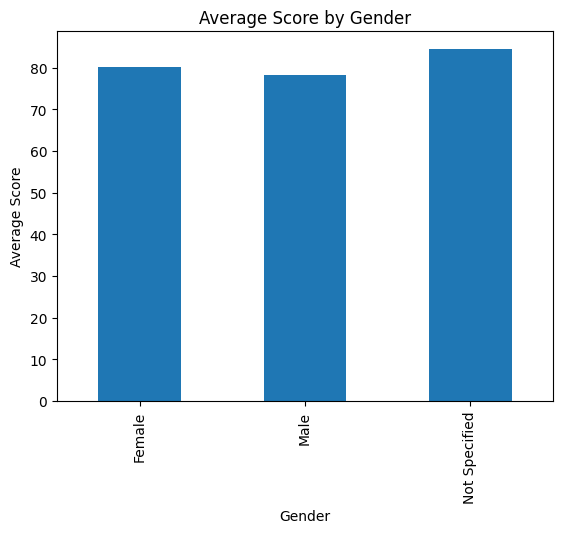

In [12]:
avg = df.groupby('Gender')['Score'].mean()
print(avg)
avg.plot(kind="bar")

plt.title("Average Score by Gender")
plt.ylabel("Average Score")
plt.xlabel("Gender")
plt.show()


<Axes: xlabel='Gender', ylabel='Score'>

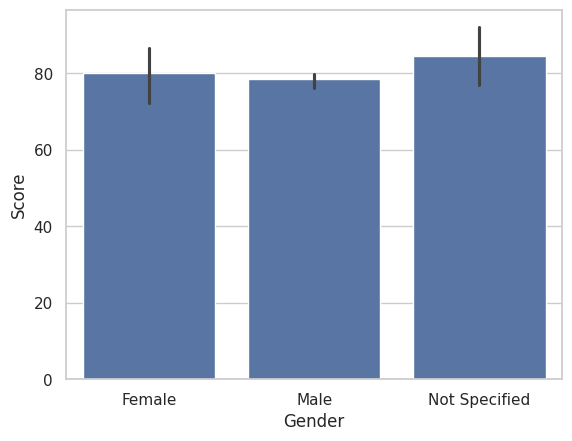

In [13]:
# Set style
sns.set(style="whitegrid")
sns.barplot(data=df, x='Gender', y='Score', estimator='mean')

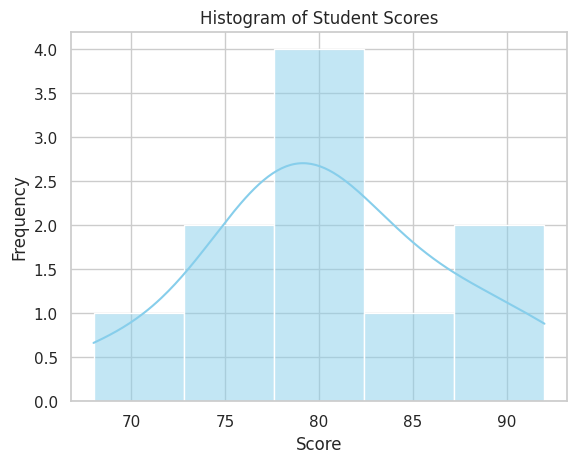

In [ ]:
#histogram
sns.histplot(data=df, x='Score', bins=5, kde=True, color='skyblue')
plt.title("Histogram of Student Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()


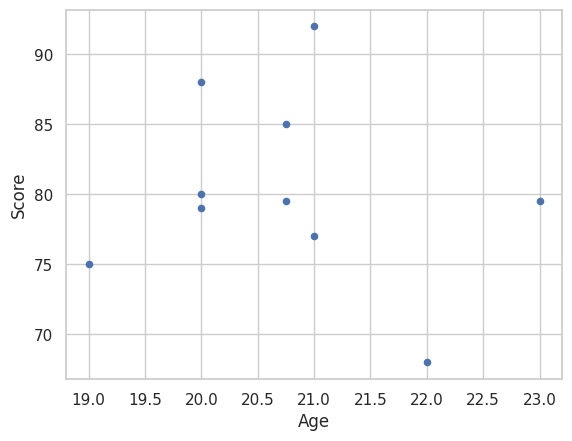

In [15]:
df.plot(x="Age", y="Score", kind="scatter")
plt.show()

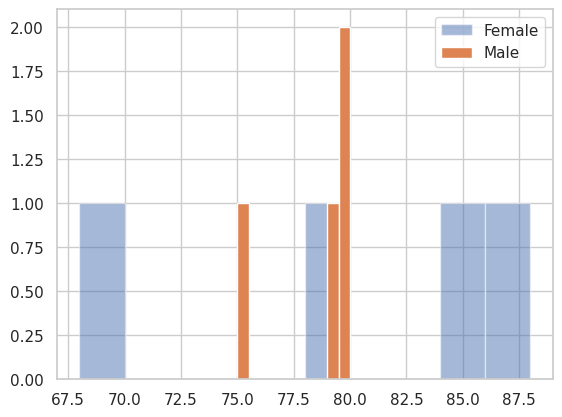

In [20]:
df[df["Gender"] == "Female"]["Score"].hist(alpha=0.5)
df[df["Gender"] == "Male"]["Score"].hist()

plt.legend(["Female", "Male"])
plt.show()


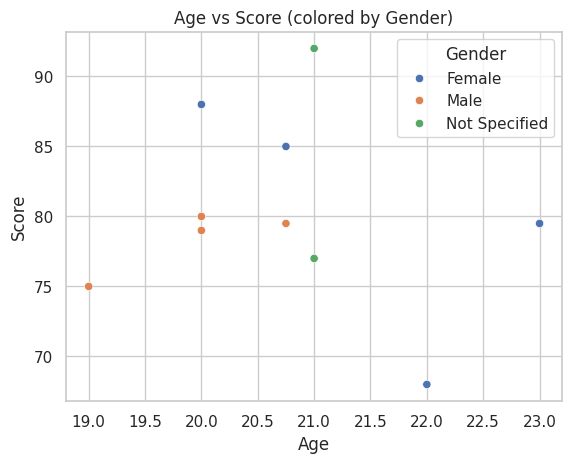

In [17]:
sns.scatterplot(data=df, x='Age', y='Score', hue='Gender')
plt.title("Age vs Score (colored by Gender)")
plt.xlabel("Age")
plt.ylabel("Score")
plt.legend()
plt.show()


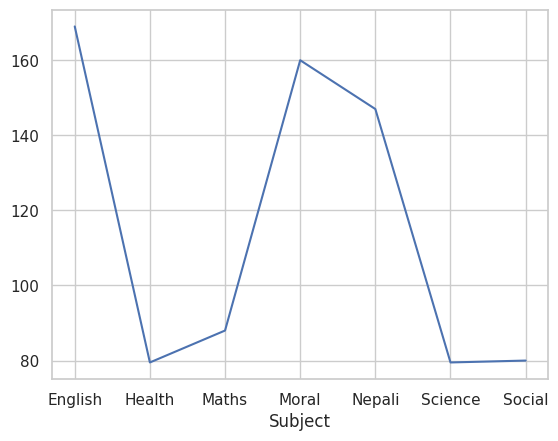

In [22]:
plot_byScore = df.groupby("Subject")["Score"].sum()

# Create a line plot of the number of avocados sold by date
plot_byScore.plot(kind="line")

plt.show()